<center>
<h1> Credit Card Spend Prediction - Case Study
</center>

<big>
**Business Context**: One of the global banks would like to understand what factors driving the credit card spend are. The objective of the case study is to understand what's driving the total spend (Primary and Secondary Card)

In [1]:
#Import lib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline
plt.rcParams['figure.figsize'] = (10,8)

In [2]:
#using seaborn style

plt.style.use("seaborn")

## Loading the Data

In [3]:
creditcard_data = pd.read_csv("Dataset/CREDIT CARD USERS DATA.csv")

C:\Users\NiranjanKumar\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (2,19,21,49,87,88,102) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
creditcard_data.head()

,custid,region,townsize,gender,age,agecat,birthmonth,ed,edcat,jobcat,...,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,3964-QJWTRG-NPN,1.0,2.00,1.0,20.0,2.0,September,15.0,3.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0648-AIPJSP-UVM,5.0,5.00,0.0,22.0,2.0,May,17.0,4.0,2.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
2,5195-TLUDJE-HVO,3.0,4.00,1.0,67.0,6.0,June,14.0,2.0,2.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,4459-VLPQUH-3OL,4.0,3.00,0.0,23.0,2.0,May,16.0,3.0,2.0,...,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
4,8158-SMTQFB-CNO,2.0,2.00,0.0,26.0,3.0,July,16.0,3.0,2.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [5]:
creditcard_data.shape

(5000, 132)

## Exploratory Analysis

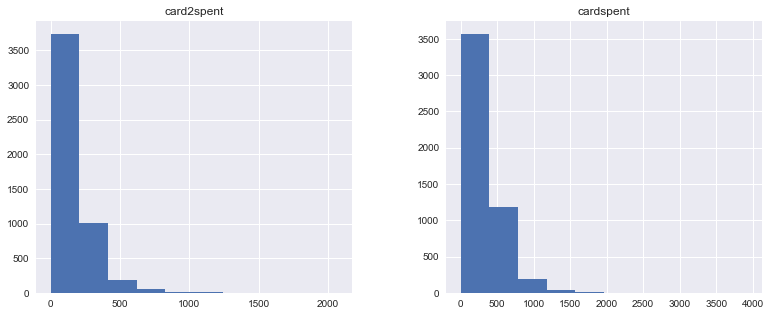

In [6]:
#Distribution of spends

creditcard_data.loc[:,["cardspent", "card2spent"]].hist(figsize = (13,5))

plt.show()

- Creating a new Derived Variable "TotalCreditSpend" which is a summation of primary and secondary spend
- Droping "cardspent"(Primary card), "card2spend"(Secondary card) and carditems,card2items as they are depend on spending

In [7]:
creditcard_data["TotalCreditSpend"] = creditcard_data["cardspent"] + creditcard_data["card2spent"]

In [8]:
#dropping the redudant variables

creditcard_data.drop(["cardspent", "card2spent", "carditems", "card2items", "custid"], axis = 1, inplace=True)

In [9]:
creditcard_data.shape

(5000, 128)

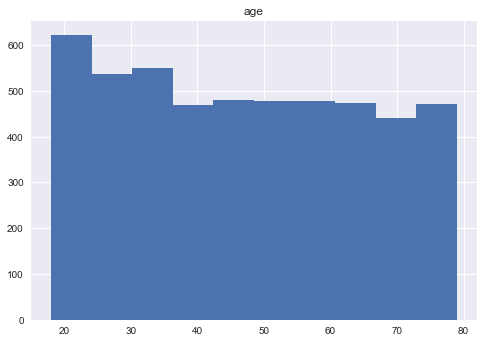

In [10]:
#Checking the age distribution of customers

creditcard_data.loc[:,["age"]].hist()

plt.show()

## Segregating Categorical and Numerical Data

In [11]:
#filtering the names of numerical and categorical variables

numeric_var_names = [key for key in dict(creditcard_data.dtypes) if dict(creditcard_data.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_var_names = [key for key in dict(creditcard_data.dtypes) if dict(creditcard_data.dtypes)[key] in ['object']]

In [12]:
print(numeric_var_names)

['region', 'gender', 'age', 'agecat', 'ed', 'edcat', 'jobcat', 'union', 'employ', 'empcat', 'retire', 'income', 'lninc', 'inccat', 'debtinc', 'creddebt', 'othdebt', 'default', 'jobsat', 'marital', 'spoused', 'spousedcat', 'reside', 'pets', 'pets_cats', 'pets_dogs', 'pets_birds', 'pets_reptiles', 'pets_small', 'pets_saltfish', 'pets_freshfish', 'homeown', 'hometype', 'address', 'addresscat', 'cars', 'carown', 'cartype', 'carvalue', 'carcatvalue', 'carbought', 'carbuy', 'commute', 'commutecat', 'commutecar', 'commutemotorcycle', 'commutecarpool', 'commutebus', 'commuterail', 'commutepublic', 'commutebike', 'commutewalk', 'commutenonmotor', 'telecommute', 'reason', 'polview', 'polparty', 'polcontrib', 'vote', 'card', 'cardtype', 'cardbenefit', 'cardfee', 'cardtenure', 'cardtenurecat', 'card2', 'card2type', 'card2benefit', 'card2fee', 'card2tenure', 'card2tenurecat', 'active', 'bfast', 'tenure', 'churn', 'longmon', 'lnlongmon', 'tollfree', 'tollmon', 'tollten', 'equip', 'equipmon', 'equipt

In [13]:
print(cat_var_names)

['townsize', 'birthmonth', 'lncreddebt', 'lnothdebt', 'commutetime', 'longten', 'lnlongten', 'lntollmon', 'lntollten', 'lnequipmon', 'lnequipten', 'lncardmon', 'cardten', 'lncardten', 'lnwiremon', 'lnwireten']


In [14]:
#numeric data

creditcard_numericdata = creditcard_data[numeric_var_names]

In [15]:
creditcard_numericdata.head()

,region,gender,age,agecat,ed,edcat,jobcat,union,employ,empcat,...,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03,TotalCreditSpend
0,1.0,1.0,20.0,2.0,15.0,3.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,149.46
1,5.0,0.0,22.0,2.0,17.0,4.0,2.0,0.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,77.54
2,3.0,1.0,67.0,6.0,14.0,2.0,2.0,0.0,16.0,5.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,359.97
3,4.0,0.0,23.0,2.0,16.0,3.0,2.0,0.0,0.0,1.0,...,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,359.41
4,2.0,0.0,26.0,3.0,16.0,3.0,2.0,0.0,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,507.83


In [16]:
#categorical data

creditcard_catdata = creditcard_data[cat_var_names]

In [17]:
creditcard_catdata.head()

,townsize,birthmonth,lncreddebt,lnothdebt,commutetime,longten,lnlongten,lntollmon,lntollten,lnequipmon,lnequipten,lncardmon,cardten,lncardten,lnwiremon,lnwireten
0,2.00,September,0.18,0.81,22.00,34.40,3.54,3.37,5.08,3.38,4.84,2.66,60.00,4.09,#NULL!,#NULL!
1,5.00,May,0.20,0.45,29.00,330.60,5.80,#NULL!,#NULL!,4.00,7.59,2.77,610.00,6.41,3.82,7.43
2,4.00,June,-0.07,0.93,24.00,1858.35,7.53,#NULL!,#NULL!,#NULL!,#NULL!,3.14,1410.00,7.25,#NULL!,#NULL!
3,3.00,May,-3.78,0.11,38.00,199.45,5.30,#NULL!,#NULL!,#NULL!,#NULL!,3.04,685.00,6.53,#NULL!,#NULL!
4,2.00,July,-1.54,-1.74,32.00,74.10,4.31,2.80,5.96,#NULL!,#NULL!,2.85,360.00,5.89,2.95,6.02


In [18]:
# converting all the numerical values present in string format to numeric format
# using errors = "coerce" to supress any errors into Nan values

creditcard_data.townsize = pd.to_numeric(creditcard_catdata.townsize, errors="coerce")
creditcard_data.lncreddebt = pd.to_numeric(creditcard_catdata.lncreddebt , errors="coerce")
creditcard_data.lnothdebt = pd.to_numeric(creditcard_catdata.lnothdebt, errors="coerce")
creditcard_data.commutetime = pd.to_numeric(creditcard_catdata.commutetime, errors="coerce")
creditcard_data.longten = pd.to_numeric(creditcard_catdata.longten, errors="coerce")
creditcard_data.lnlongten = pd.to_numeric(creditcard_catdata.lnlongten, errors="coerce")
creditcard_data.lntollmon = pd.to_numeric(creditcard_catdata.lntollmon, errors="coerce")
creditcard_data.lntollten = pd.to_numeric(creditcard_catdata.lntollten, errors="coerce")
creditcard_data.lnequipmon = pd.to_numeric(creditcard_catdata.lnequipmon, errors="coerce")
creditcard_data.lnequipten = pd.to_numeric(creditcard_catdata.lnequipten, errors="coerce")
creditcard_data.lncardmon = pd.to_numeric(creditcard_catdata.lncardmon, errors="coerce")
creditcard_data.cardten = pd.to_numeric(creditcard_catdata.cardten, errors="coerce")
creditcard_data.lncardten = pd.to_numeric(creditcard_catdata.lncardten, errors="coerce")
creditcard_data.lnwiremon = pd.to_numeric(creditcard_catdata.lnwiremon, errors="coerce")
creditcard_data.lnwireten = pd.to_numeric(creditcard_catdata.lnwireten, errors="coerce")

## Segregation of Numerical and Categorical data

- Some Categorical data is present in the form of numerical values. so we have to seperate them out.

In [19]:
cat_var_names = ["region", "townsize", "gender", "agecat", "birthmonth", "edcat", "jobcat",
            "union","employ","empcat","retire","inccat","default","jobsat","marital","spousedcat","homeown",
                "hometype","address","addresscat","cars",
"carown","cartype","carcatvalue","carbought","carbuy","commute","commutecat","commutecar","commutemotorcycle","commutecarpool","commutebus","commuterail","commutepublic","commutebike","commutewalk","commutenonmotor","telecommute","reason","polview",
"polparty","polcontrib","vote","card","cardtype","cardbenefit","cardfee","cardtenure","cardtenurecat","card2",
"card2type","card2benefit","card2fee","card2tenure","card2tenurecat","active","bfast","churn","tollfree","equip","callcard",
"wireless","multline",
"voice","pager","internet","callid","callwait","forward","confer","ebill","owntv","ownvcr","owndvd","owncd","ownpda",
"ownpc","ownipod","owngame", "ownfax","news", "response_01" ,"response_02", "response_03"]

In [20]:
#categorical data

creditcard_catdata = creditcard_data[cat_var_names]

In [21]:
creditcard_catdata.head()

,region,townsize,gender,agecat,birthmonth,edcat,jobcat,union,employ,empcat,...,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,1.0,2.0,1.0,2.0,September,3.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,5.0,5.0,0.0,2.0,May,4.0,2.0,0.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
2,3.0,4.0,1.0,6.0,June,2.0,2.0,0.0,16.0,5.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,4.0,3.0,0.0,2.0,May,3.0,2.0,0.0,0.0,1.0,...,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
4,2.0,2.0,0.0,3.0,July,3.0,2.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [22]:
#getting the numeric data column names

numeric_var_names = list(creditcard_data.columns.difference(cat_var_names))

In [23]:
creditcard_numericdata = creditcard_data[numeric_var_names]

In [24]:
creditcard_numericdata.head()

,TotalCreditSpend,age,cardmon,cardten,carvalue,commutetime,creddebt,debtinc,ed,equipmon,...,pets_reptiles,pets_saltfish,pets_small,reside,spoused,tenure,tollmon,tollten,wiremon,wireten
0,149.46,20.0,14.25,60.0,14.3,22.0,1.20,11.1,15.0,29.50,...,0.0,0.0,0.0,3.0,-1.0,5.0,29.0,161.05,0.00,0.00
1,77.54,22.0,16.00,610.0,6.8,29.0,1.22,18.6,17.0,54.85,...,0.0,0.0,0.0,2.0,-1.0,39.0,0.0,0.00,45.65,1683.55
2,359.97,67.0,23.00,1410.0,18.8,24.0,0.93,9.9,14.0,0.00,...,0.0,0.0,0.0,3.0,13.0,65.0,0.0,0.00,0.00,0.00
3,359.41,23.0,21.00,685.0,8.7,38.0,0.02,5.7,16.0,0.00,...,0.0,0.0,0.0,5.0,18.0,36.0,0.0,0.00,0.00,0.00
4,507.83,26.0,17.25,360.0,10.6,32.0,0.21,1.7,16.0,0.00,...,0.0,0.0,0.0,4.0,13.0,21.0,16.5,387.70,19.05,410.80


# Data Preparation
- Missing Values
- Handling of categorical variables

## Missing Values

In [25]:
creditcard_data.shape[0]

5000

In [26]:
missing_df = pd.DataFrame(creditcard_data.isnull().sum()).reset_index()
missing_df.columns = ["ColumnName", "MissingCount"]

In [27]:
missing_df["Percent_Missing"] = round(missing_df["MissingCount"]/creditcard_data.shape[0],3) * 100

In [28]:
missing_df.sort_values(by = "MissingCount", ascending=False)

,ColumnName,MissingCount,Percent_Missing
101,lnwiremon,3656,73.1
103,lnwireten,3656,73.1
93,lnequipten,3296,65.9
91,lnequipmon,3296,65.9
88,lntollten,2622,52.4
86,lntollmon,2622,52.4
98,lncardten,1422,28.4
96,lncardmon,1419,28.4
82,longten,3,0.1
83,lnlongten,3,0.1


- Dropping all the columns having more than 25% of Missing values in the data

In [29]:
missinglist = ["lnwiremon", "lnwireten", "lnequipten", "lnequipmon", "lntollmon", "lntollten", 
                      "lncardten", "lncardmon"]

In [30]:
creditcard_data.drop(missinglist, axis = 1, inplace = True)

In [31]:
#dimensions after dropping the columns

creditcard_data.shape

(5000, 120)

<big>

- From total of 132 variables, variables are brought down to 120 variables

In [32]:
#deleting the dropped variables from the list

for eachelement in missinglist:
    numeric_var_names.remove(eachelement)

In [33]:
#updating the numeric dataframe

creditcard_numericdata = creditcard_data[numeric_var_names]

In [34]:
creditcard_numericdata.head()

,TotalCreditSpend,age,cardmon,cardten,carvalue,commutetime,creddebt,debtinc,ed,equipmon,...,pets_reptiles,pets_saltfish,pets_small,reside,spoused,tenure,tollmon,tollten,wiremon,wireten
0,149.46,20.0,14.25,60.0,14.3,22.0,1.20,11.1,15.0,29.50,...,0.0,0.0,0.0,3.0,-1.0,5.0,29.0,161.05,0.00,0.00
1,77.54,22.0,16.00,610.0,6.8,29.0,1.22,18.6,17.0,54.85,...,0.0,0.0,0.0,2.0,-1.0,39.0,0.0,0.00,45.65,1683.55
2,359.97,67.0,23.00,1410.0,18.8,24.0,0.93,9.9,14.0,0.00,...,0.0,0.0,0.0,3.0,13.0,65.0,0.0,0.00,0.00,0.00
3,359.41,23.0,21.00,685.0,8.7,38.0,0.02,5.7,16.0,0.00,...,0.0,0.0,0.0,5.0,18.0,36.0,0.0,0.00,0.00,0.00
4,507.83,26.0,17.25,360.0,10.6,32.0,0.21,1.7,16.0,0.00,...,0.0,0.0,0.0,4.0,13.0,21.0,16.5,387.70,19.05,410.80


## Missing Value imputation

In [35]:
##imputing the missing values - numerical data (mean)
creditcard_numericdata.lnlongten.fillna(creditcard_numericdata.lnlongten.mean(),inplace=True)
creditcard_numericdata.longten.fillna(creditcard_numericdata.longten.mean(),inplace=True)
creditcard_numericdata.cardten.fillna(creditcard_numericdata.cardten.mean(),inplace=True)
creditcard_numericdata.commutetime.fillna(creditcard_numericdata.commutetime.mean(),inplace=True)
creditcard_numericdata.lnothdebt.fillna(creditcard_numericdata.lnothdebt.mean(),inplace=True)
creditcard_numericdata.lnothdebt.fillna(creditcard_numericdata.lnothdebt.mean(),inplace=True)
creditcard_numericdata.lncreddebt.fillna(creditcard_numericdata.lncreddebt.mean(), inplace=True)

C:\Users\NiranjanKumar\Anaconda3\lib\site-packages\pandas\core\generic.py:5430: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [36]:
#imputing with median - categorical data
creditcard_catdata.townsize.fillna(creditcard_catdata.townsize.median(),inplace=True)

C:\Users\NiranjanKumar\Anaconda3\lib\site-packages\pandas\core\generic.py:5430: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


##  Creating Data Audit Report

In [37]:
# Creating Data audit Report
# Use a general function that returns multiple values
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.isnull().mean(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'NMISS_PCT', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])


In [38]:
numeric_summary_report = pd.DataFrame(creditcard_numericdata.apply(var_summary).T)

In [39]:
#numeric_summary_report.to_csv('numeric_summary_report.csv')
numeric_summary_report

,N,NMISS,NMISS_PCT,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
TotalCreditSpend,5000.0,0.0,0.0,2.490393e+06,498.078630,414.25,351.529270,1.235728e+05,8.11,58.1976,133.1060,184.033,276.2825,414.25,615.5625,908.125,1145.1465,1760.1024,4881.05
age,5000.0,0.0,0.0,2.351280e+05,47.025600,47.00,17.770338,3.157849e+02,18.00,18.0000,20.0000,23.000,31.0000,47.00,62.0000,72.000,76.0000,79.0000,79.00
cardmon,5000.0,0.0,0.0,7.721925e+04,15.443850,13.75,15.007569,2.252271e+02,0.00,0.0000,0.0000,0.000,0.0000,13.75,22.7500,34.000,42.0000,64.2500,188.50
cardten,5000.0,0.0,0.0,3.602392e+06,720.478391,425.00,922.041026,8.501597e+05,0.00,0.0000,0.0000,0.000,0.0000,425.00,1080.0000,1870.500,2455.2500,4010.4000,13705.00
carvalue,5000.0,0.0,0.0,1.161629e+05,23.232580,17.00,21.231637,4.507824e+02,-1.00,-1.0000,-1.0000,2.490,9.2000,17.00,31.1000,52.910,72.0000,92.0010,99.60
commutetime,5000.0,0.0,0.0,1.267277e+05,25.345538,25.00,5.877973,3.455056e+01,8.00,13.0000,16.0000,18.000,21.0000,25.00,29.0000,33.000,35.0000,40.0100,48.00
creddebt,5000.0,0.0,0.0,9.286820e+03,1.857364,0.93,3.415789,1.166762e+01,0.00,0.0300,0.1000,0.180,0.3900,0.93,2.0600,4.300,6.3715,14.2804,109.07
debtinc,5000.0,0.0,0.0,4.977080e+04,9.954160,8.80,6.399783,4.095723e+01,0.00,0.7000,1.9000,2.800,5.1000,8.80,13.6000,18.600,22.2000,29.2000,43.10
ed,5000.0,0.0,0.0,7.271500e+04,14.543000,14.00,3.281083,1.076550e+01,6.00,8.0000,9.0000,10.000,12.0000,14.00,17.0000,19.000,20.0000,21.0000,23.00
equipmon,5000.0,0.0,0.0,6.495655e+04,12.991310,0.00,19.212943,3.691372e+02,0.00,0.0000,0.0000,0.000,0.0000,0.00,30.8000,42.700,49.0525,63.3005,106.30


### Data Report - Categorical Data

In [40]:
def cat_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.mode()], 
                  index=['N', 'NMISS', 'ColumnMode'])

In [41]:
cat_summary=creditcard_catdata.apply(lambda x: cat_summary(x))

In [42]:
#cat_summary.T.to_csv('cat_summary.csv')
cat_summary.T

,N,NMISS,ColumnMode
region,5000,0,0 5.0 dtype: float64
townsize,5000,0,0 1.0 dtype: float64
gender,5000,0,0 1.0 dtype: float64
agecat,5000,0,0 4.0 dtype: float64
birthmonth,5000,0,0 September dtype: object
edcat,5000,0,0 2.0 dtype: float64
jobcat,5000,0,0 2.0 dtype: float64
union,5000,0,0 0.0 dtype: float64
employ,5000,0,0 0.0 dtype: float64
empcat,5000,0,0 2.0 dtype: float64


## Outlier Analysis - BoxPlot and Histogram
- Numerical Variables

In [43]:
def outlier_plots(dataframe, variable):
    """Function to plot histogram and boxplots"""
    
    #create 2 subplots for 2 columns
    fig,ax = plt.subplots(ncols=2, sharey= False, figsize = (14,6))
    
    #distribution plots
    sns.distplot(a = dataframe[variable], hist=True, kde=False, ax = ax[0])
    
    #barplots 
    sns.boxplot(x = variable,data=dataframe,ax=ax[1])
    
    #set title
    plt.suptitle("Histogram and Boxplot for {}".format(variable.capitalize()))
    plt.show()

C:\Users\NiranjanKumar\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


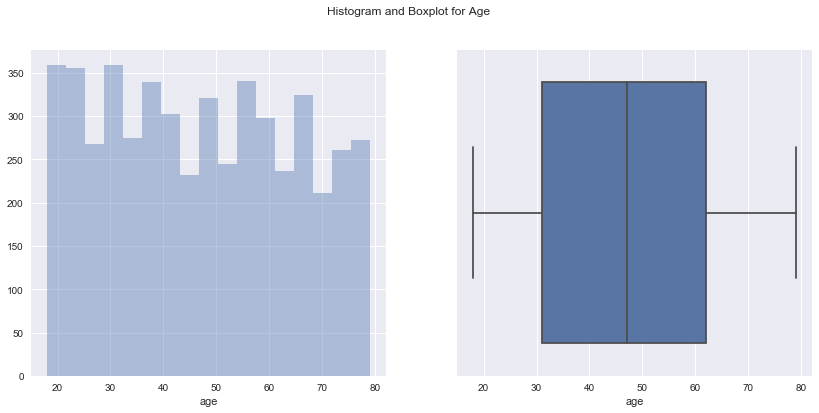

In [44]:
outlier_plots(creditcard_numericdata, "age")

C:\Users\NiranjanKumar\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


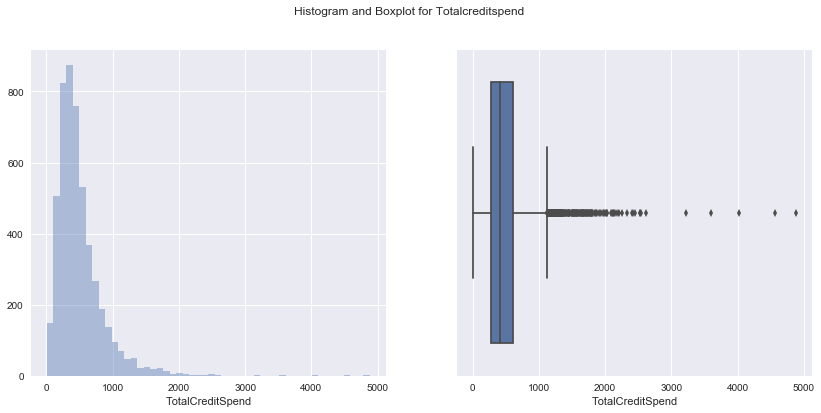

In [45]:
outlier_plots(creditcard_numericdata, "TotalCreditSpend")

C:\Users\NiranjanKumar\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


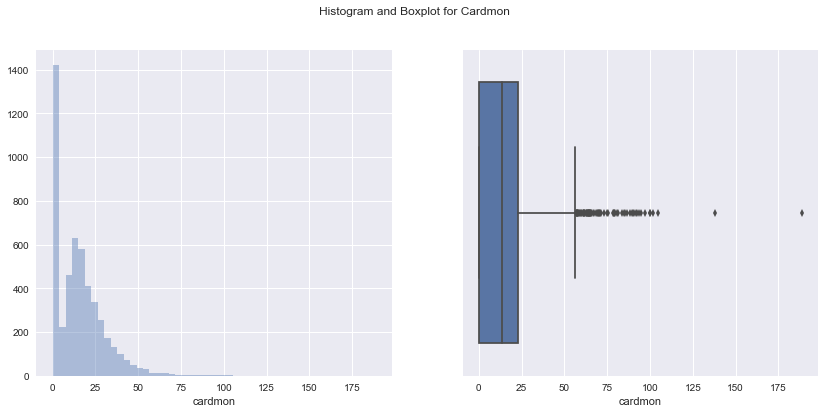

In [46]:
outlier_plots(creditcard_numericdata, "cardmon")

C:\Users\NiranjanKumar\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


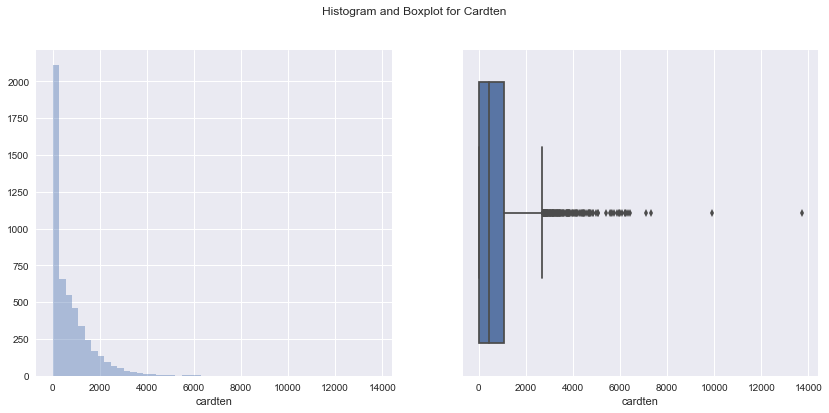

In [47]:
outlier_plots(creditcard_numericdata, "cardten")

C:\Users\NiranjanKumar\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


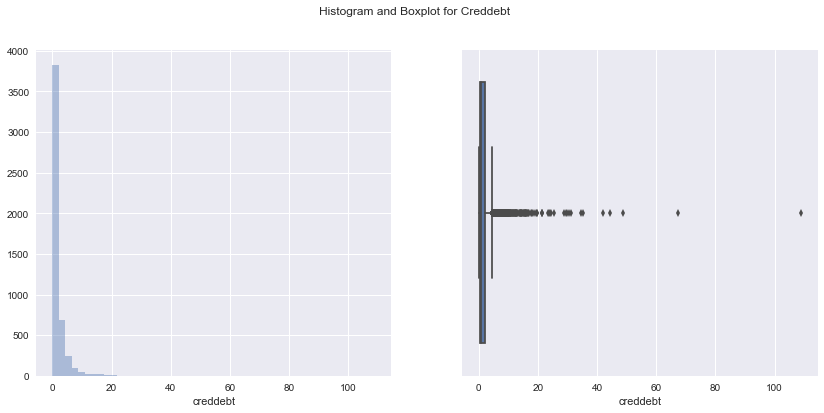

In [48]:
outlier_plots(creditcard_numericdata, "creddebt")

C:\Users\NiranjanKumar\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


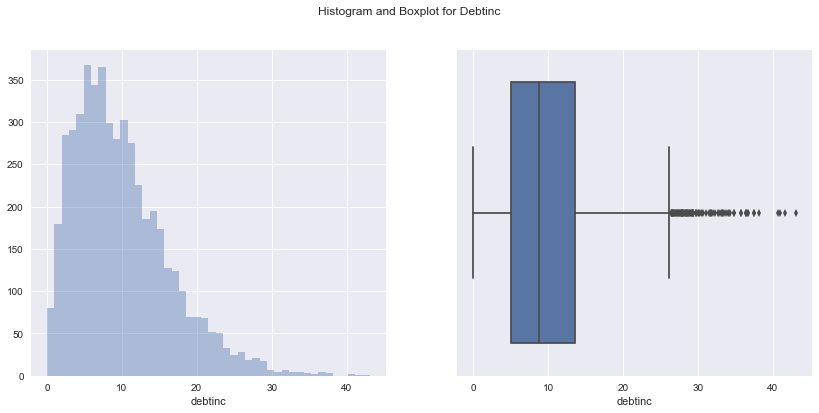

In [49]:
outlier_plots(creditcard_numericdata, "debtinc")

In [50]:
#Handling Outliers 
def outlier_capping(x):
    x = x.clip_upper(x.quantile(0.95))
    x = x.clip_lower(x.quantile(0.05))
    return x

In [51]:
#capping outliers in numerical data

creditcard_numericdata=creditcard_numericdata.apply(lambda x: outlier_capping(x), axis = 1)

In [52]:
def categorical_segmentationplots(variablename):
    """Function to plot segmentation plots of target variable using categorical variables"""
    creditcard_data.boxplot("TotalCreditSpend", by=variablename)
    plt.show()

### Correlation

In [53]:
creditcard_numericdata.corr()

,TotalCreditSpend,age,cardmon,cardten,carvalue,commutetime,creddebt,debtinc,ed,equipmon,...,pets_reptiles,pets_saltfish,pets_small,reside,spoused,tenure,tollmon,tollten,wiremon,wireten
TotalCreditSpend,1.000000,0.286579,0.336840,0.493325,0.375895,-0.008647,0.299754,0.024710,0.087137,0.189335,...,1.184980e-02,-0.014847,0.004800,-0.027421,0.118388,0.514137,0.303100,0.388335,0.264365,0.328467
age,0.286579,1.000000,0.294923,0.418414,0.181351,-0.044421,0.122302,0.040929,-0.091128,-0.096810,...,8.770332e-03,-0.000680,0.003584,-0.333282,0.001455,0.622906,0.114123,0.244134,-0.017876,0.121031
cardmon,0.336840,0.294923,1.000000,0.692378,0.134897,-0.017223,0.085012,0.010201,-0.039531,0.045690,...,-8.836741e-03,0.013581,0.003193,-0.033364,0.079317,0.433603,0.323438,0.368303,0.203674,0.246622
cardten,0.493325,0.418414,0.692378,1.000000,0.243386,-0.018332,0.159171,0.017275,0.007967,0.161923,...,6.230403e-03,0.002187,0.011535,-0.058579,0.133065,0.687311,0.474026,0.698642,0.318859,0.520538
carvalue,0.375895,0.181351,0.134897,0.243386,1.000000,-0.013221,0.443988,0.014586,0.159226,0.091641,...,-1.095238e-02,-0.005755,0.001763,-0.068971,0.041665,0.203230,0.194352,0.234371,0.162266,0.189995
commutetime,-0.008647,-0.044421,-0.017223,-0.018332,-0.013221,1.000000,0.000402,0.000836,-0.007180,-0.000196,...,8.165165e-03,0.008135,0.009826,0.017710,0.001894,-0.006193,-0.032542,-0.028045,0.002825,-0.007652
creddebt,0.299754,0.122302,0.085012,0.159171,0.443988,0.000402,1.000000,0.368507,0.105702,0.041695,...,-1.292875e-06,-0.000008,-0.005510,-0.043506,0.017066,0.129681,0.140788,0.188026,0.115578,0.165531
debtinc,0.024710,0.040929,0.010201,0.017275,0.014586,0.000836,0.368507,1.000000,0.011716,-0.001333,...,1.685914e-02,0.018103,0.009218,-0.023100,-0.027053,0.019263,-0.006862,0.010806,-0.001879,0.013534
ed,0.087137,-0.091128,-0.039531,0.007967,0.159226,-0.007180,0.105702,0.011716,1.000000,0.449337,...,-1.301414e-03,0.004737,0.008131,0.023230,0.127124,-0.095170,0.017998,0.061070,0.345550,0.244462
equipmon,0.189335,-0.096810,0.045690,0.161923,0.091641,-0.000196,0.041695,-0.001333,0.449337,1.000000,...,1.135006e-02,-0.003656,0.034504,0.022304,0.072567,-0.032248,0.120106,0.220678,0.591387,0.474086


### Categorical Variable Analysis
- Boxplots with Target Variable
- Anova Test for variable reduction

In [54]:
import scipy.stats as stats

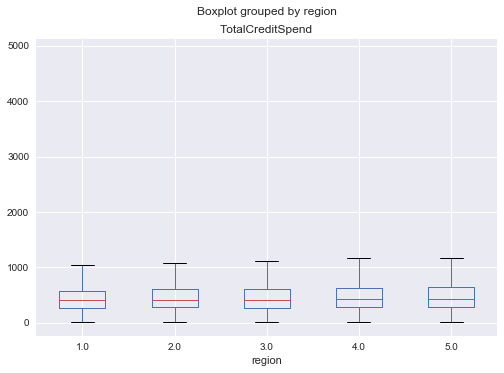

In [55]:
categorical_segmentationplots("region")

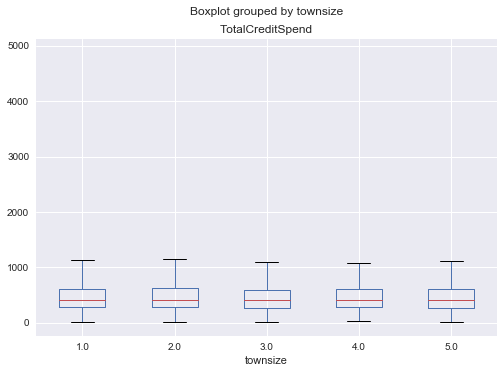

In [56]:
categorical_segmentationplots("townsize")

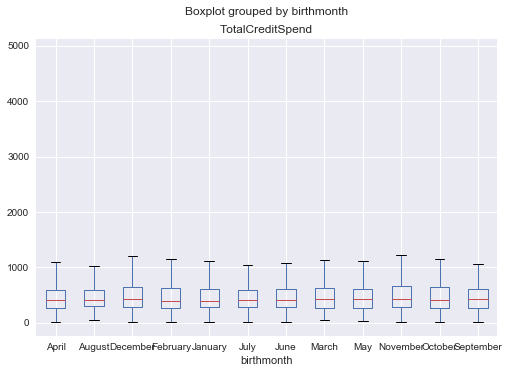

In [57]:
categorical_segmentationplots("birthmonth")

### Categorical Variable Reduction using ANOVA
- 95% confidence level

In [58]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [59]:
dctpvalue = {}
cat_var_selected = []

#performing the anova test and selecting variables with p value < 0.05 (5%)

for eachvar in cat_var_names:
    mod = ols("TotalCreditSpend ~ " + eachvar , data=creditcard_data).fit()
    aov_table = sm.stats.anova_lm(mod, typ = 2)
    p_value = round(aov_table["PR(>F)"][eachvar],4)
    
    if p_value < 0.05:
        dctpvalue[eachvar] = p_value
        cat_var_selected.append(eachvar)

In [60]:
#dictionary of values with p-value

dctpvalue

{'region': 0.0034,
 'gender': 0.0,
 'agecat': 0.0004,
 'edcat': 0.0,
 'employ': 0.0,
 'empcat': 0.0,
 'retire': 0.0,
 'inccat': 0.0,
 'jobsat': 0.0,
 'spousedcat': 0.0089,
 'homeown': 0.0,
 'address': 0.0,
 'addresscat': 0.0,
 'carown': 0.0,
 'carcatvalue': 0.0,
 'commutebike': 0.0223,
 'vote': 0.0,
 'card': 0.0,
 'cardtenure': 0.0,
 'cardtenurecat': 0.0,
 'card2': 0.0,
 'card2fee': 0.0346,
 'card2tenure': 0.0,
 'card2tenurecat': 0.0,
 'tollfree': 0.0,
 'equip': 0.0004,
 'callcard': 0.025,
 'wireless': 0.0,
 'multline': 0.0004,
 'voice': 0.0247,
 'pager': 0.0001,
 'internet': 0.0,
 'callid': 0.0002,
 'callwait': 0.0,
 'forward': 0.0001,
 'confer': 0.0,
 'owntv': 0.0,
 'ownvcr': 0.0,
 'owndvd': 0.0,
 'owncd': 0.0,
 'ownpda': 0.0,
 'ownpc': 0.0004,
 'ownipod': 0.0239,
 'ownfax': 0.0,
 'news': 0.0065,
 'response_03': 0.0013}

In [61]:
#sorting the dictionary based on the values of p-value.

lstitems = sorted(dctpvalue.items(), key=lambda x: x[1])

In [62]:
lstitems

[('gender', 0.0),
 ('edcat', 0.0),
 ('employ', 0.0),
 ('empcat', 0.0),
 ('retire', 0.0),
 ('inccat', 0.0),
 ('jobsat', 0.0),
 ('homeown', 0.0),
 ('address', 0.0),
 ('addresscat', 0.0),
 ('carown', 0.0),
 ('carcatvalue', 0.0),
 ('vote', 0.0),
 ('card', 0.0),
 ('cardtenure', 0.0),
 ('cardtenurecat', 0.0),
 ('card2', 0.0),
 ('card2tenure', 0.0),
 ('card2tenurecat', 0.0),
 ('tollfree', 0.0),
 ('wireless', 0.0),
 ('internet', 0.0),
 ('callwait', 0.0),
 ('confer', 0.0),
 ('owntv', 0.0),
 ('ownvcr', 0.0),
 ('owndvd', 0.0),
 ('owncd', 0.0),
 ('ownpda', 0.0),
 ('ownfax', 0.0),
 ('pager', 0.0001),
 ('forward', 0.0001),
 ('callid', 0.0002),
 ('agecat', 0.0004),
 ('equip', 0.0004),
 ('multline', 0.0004),
 ('ownpc', 0.0004),
 ('response_03', 0.0013),
 ('region', 0.0034),
 ('news', 0.0065),
 ('spousedcat', 0.0089),
 ('commutebike', 0.0223),
 ('ownipod', 0.0239),
 ('voice', 0.0247),
 ('callcard', 0.025),
 ('card2fee', 0.0346)]

In [63]:
#Removing the last 10 columns based on the anova test

#lstitems = lstitems[:len(lstitems)-5]

In [64]:
cat_var_selected = [x for x,y in lstitems]

In [65]:
print("Number of categorical variables before variable selection method: " + str(len(cat_var_names)))
print("Number of categorical variables after variable selection method: " + str(len(cat_var_selected)))

Number of categorical variables before variable selection method: 84
Number of categorical variables after variable selection method: 46


In [66]:
cat_var_selected

['gender',
 'edcat',
 'employ',
 'empcat',
 'retire',
 'inccat',
 'jobsat',
 'homeown',
 'address',
 'addresscat',
 'carown',
 'carcatvalue',
 'vote',
 'card',
 'cardtenure',
 'cardtenurecat',
 'card2',
 'card2tenure',
 'card2tenurecat',
 'tollfree',
 'wireless',
 'internet',
 'callwait',
 'confer',
 'owntv',
 'ownvcr',
 'owndvd',
 'owncd',
 'ownpda',
 'ownfax',
 'pager',
 'forward',
 'callid',
 'agecat',
 'equip',
 'multline',
 'ownpc',
 'response_03',
 'region',
 'news',
 'spousedcat',
 'commutebike',
 'ownipod',
 'voice',
 'callcard',
 'card2fee']

In [67]:
#updating the dataframe
creditcard_catdata = creditcard_data[cat_var_selected]

In [68]:
creditcard_catdata.head()

,gender,edcat,employ,empcat,retire,inccat,jobsat,homeown,address,addresscat,...,ownpc,response_03,region,news,spousedcat,commutebike,ownipod,voice,callcard,card2fee
0,1.0,3.0,0.0,1.0,0.0,2.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,-1.0,0.0,1.0,1.0,1.0,0.0
1,0.0,4.0,0.0,1.0,0.0,1.0,1.0,1.0,2.0,1.0,...,1.0,0.0,5.0,1.0,-1.0,1.0,1.0,1.0,1.0,0.0
2,1.0,2.0,16.0,5.0,0.0,2.0,4.0,1.0,30.0,5.0,...,0.0,0.0,3.0,1.0,2.0,0.0,0.0,0.0,1.0,0.0
3,0.0,3.0,0.0,1.0,0.0,1.0,2.0,1.0,3.0,2.0,...,1.0,0.0,4.0,1.0,4.0,0.0,1.0,0.0,1.0,0.0
4,0.0,3.0,1.0,1.0,0.0,1.0,1.0,0.0,3.0,2.0,...,1.0,0.0,2.0,0.0,2.0,0.0,0.0,1.0,1.0,0.0


In [69]:
creditcard_catdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 46 columns):
gender            5000 non-null float64
edcat             5000 non-null float64
employ            5000 non-null float64
empcat            5000 non-null float64
retire            5000 non-null float64
inccat            5000 non-null float64
jobsat            5000 non-null float64
homeown           5000 non-null float64
address           5000 non-null float64
addresscat        5000 non-null float64
carown            5000 non-null float64
carcatvalue       5000 non-null float64
vote              5000 non-null float64
card              5000 non-null float64
cardtenure        5000 non-null float64
cardtenurecat     5000 non-null float64
card2             5000 non-null float64
card2tenure       5000 non-null float64
card2tenurecat    5000 non-null float64
tollfree          5000 non-null float64
wireless          5000 non-null float64
internet          5000 non-null float64
callwait     

## Handling categorical features

scikit-learn expects all features to be numeric. So how do we include a categorical feature in our model?

- **Ordered categories:** transform them to sensible numeric values (example: small=1, medium=2, large=3)
- **Unordered categories:** use dummy encoding (0/1)

What are the categorical features in our dataset?

- **Ordered categories:** weather (already encoded with sensible numeric values)
- **Unordered categories:** season (needs dummy encoding), holiday (already dummy encoded), workingday (already dummy encoded)

For season, we can't simply leave the encoding as 1 = spring, 2 = summer, 3 = fall, and 4 = winter, because that would imply an **ordered relationship**. Instead, we create **multiple dummy variables:**

In [70]:
# an function to create dummies

def create_dummies(df, name):
    col_dummies = pd.get_dummies(df[name],prefix=name)
    col_dummies.drop(col_dummies.columns[0], axis=1,inplace = True)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop(name, axis = 1,inplace = True)
    
    return df

In [71]:
# generating the dummies

for eachvariable in cat_var_selected:
    creditcard_catdata = create_dummies(creditcard_catdata, eachvariable)

In [72]:
creditcard_catdata.head()

,gender_1.0,edcat_2.0,edcat_3.0,edcat_4.0,edcat_5.0,employ_1.0,employ_2.0,employ_3.0,employ_4.0,employ_5.0,...,spousedcat_1.0,spousedcat_2.0,spousedcat_3.0,spousedcat_4.0,spousedcat_5.0,commutebike_1.0,ownipod_1.0,voice_1.0,callcard_1.0,card2fee_1.0
0,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,1,0
2,1,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
4,0,0,1,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0


### Creation of Base Table

In [73]:
#Merging of numerical data and categorical dataframe

In [74]:
creditcard_data_merged = pd.concat([creditcard_numericdata,creditcard_catdata], axis = 1)

In [75]:
creditcard_data_merged.head()

,TotalCreditSpend,age,cardmon,cardten,carvalue,commutetime,creddebt,debtinc,ed,equipmon,...,spousedcat_1.0,spousedcat_2.0,spousedcat_3.0,spousedcat_4.0,spousedcat_5.0,commutebike_1.0,ownipod_1.0,voice_1.0,callcard_1.0,card2fee_1.0
0,131.940,20.0,14.25,60.0000,14.3,22.0,1.20,11.1,15.0,29.50,...,0,0,0,0,0,0,1,1,1,0
1,77.540,22.0,16.00,610.0000,6.8,29.0,1.22,18.6,17.0,54.85,...,0,0,0,0,0,1,1,1,1,0
2,359.970,67.0,23.00,622.4775,18.8,24.0,0.93,9.9,14.0,0.00,...,0,1,0,0,0,0,0,0,1,0
3,239.440,23.0,21.00,239.4400,8.7,38.0,0.02,5.7,16.0,0.00,...,0,0,0,1,0,0,1,0,1,0
4,393.475,26.0,17.25,360.0000,10.6,32.0,0.21,1.7,16.0,0.00,...,0,1,0,0,0,0,0,1,1,0


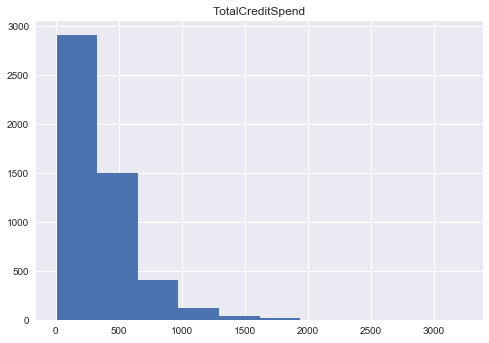

In [76]:
#checking the distribution of Target variable

creditcard_data_merged[["TotalCreditSpend"]].hist()

plt.show()

<big>
- Target variable is postively skewed, so taking the log transformation

In [77]:
creditcard_data_merged['ln_totalcreditspend'] = np.log(creditcard_data_merged["TotalCreditSpend"] + 1)

In [78]:
#dropping the TotalCreditSpend

creditcard_data_merged.drop(["TotalCreditSpend"],axis =1, inplace=True)

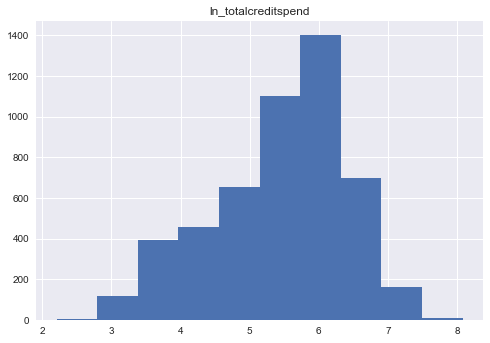

In [79]:
#checking the distribution of Target variable

#Log(TotalCreditSpend)
(creditcard_data_merged[["ln_totalcreditspend"]]).hist()

plt.show()

In [80]:
creditcard_data_merged.head()

,age,cardmon,cardten,carvalue,commutetime,creddebt,debtinc,ed,equipmon,equipten,...,spousedcat_2.0,spousedcat_3.0,spousedcat_4.0,spousedcat_5.0,commutebike_1.0,ownipod_1.0,voice_1.0,callcard_1.0,card2fee_1.0,ln_totalcreditspend
0,20.0,14.25,60.0000,14.3,22.0,1.20,11.1,15.0,29.50,126.1000,...,0,0,0,0,0,1,1,1,0,4.889898
1,22.0,16.00,610.0000,6.8,29.0,1.22,18.6,17.0,54.85,878.3875,...,0,0,0,0,1,1,1,1,0,4.363608
2,67.0,23.00,622.4775,18.8,24.0,0.93,9.9,14.0,0.00,0.0000,...,1,0,0,0,0,0,0,1,0,5.888795
3,23.0,21.00,239.4400,8.7,38.0,0.02,5.7,16.0,0.00,0.0000,...,0,0,1,0,0,1,0,1,0,5.482471
4,26.0,17.25,360.0000,10.6,32.0,0.21,1.7,16.0,0.00,0.0000,...,1,0,0,0,0,0,1,1,0,5.977556


In [81]:
#exporting cleaned data

creditcard_data_merged.to_csv("cleaneddata_creditcard.csv",index=False)